<a href="https://colab.research.google.com/github/jkranyak/705_MBA_FinalPaper/blob/main/705_MBA_FinalPaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Directory where your .csv files are stored
directory = "/content/data"

# Initialize an empty list to hold dataframes
dataframes = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)

        # Read the csv file
        df = pd.read_csv(filepath)

        # Standardize column names and data
        # Assume the columns we care about are 'Author' and 'Article'
        if 'Author' not in df.columns and 'Article' not in df.columns:
            # Handle cases where author and article are in different columns or require renaming
            for col in df.columns:
                if 'Author' in col:
                    df.rename(columns={col: 'Author'}, inplace=True)
                elif 'Article' in col:
                    df.rename(columns={col: 'Article'}, inplace=True)

        dataframes.append(df)

# Concatenate all dataframes into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the combined DataFrame
combined_df.columns.tolist()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Title',
 'Link',
 'Source',
 'Author',
 'URL',
 'Abstract',
 'Year',
 'BibTeX',
 'title',
 'authors',
 'date',
 'source',
 'url',
 'summary']

In [2]:
import pandas as pd

# Prioritized columns to merge
columns_to_merge = ['Link', 'URL', 'url']

# Function to merge columns into one
def merge_columns(row, columns):
    for column in columns:
        if pd.notnull(row[column]):
            return row[column]
    return None

# Create a new column 'Web_Address' using the merge_columns function
combined_df['Web_Address'] = combined_df.apply(merge_columns, columns=columns_to_merge, axis=1)

# Drop the original columns
combined_df.drop(columns=columns_to_merge, inplace=True)

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        82 non-null     object 
 1   Source       82 non-null     object 
 2   Author       18 non-null     object 
 3   Abstract     10 non-null     object 
 4   Year         18 non-null     float64
 5   BibTeX       18 non-null     object 
 6   title        19 non-null     object 
 7   authors      19 non-null     object 
 8   date         19 non-null     float64
 9   source       19 non-null     object 
 10  summary      19 non-null     object 
 11  Web_Address  96 non-null     object 
dtypes: float64(2), object(10)
memory usage: 9.6+ KB


In [3]:
# Display the BibTeX column of combined_df
combined_df['BibTeX']


0                                                    NaN
1                                                    NaN
2                                                    NaN
3                                                    NaN
4                                                    NaN
                             ...                        
96     @Article{Topol2019HighperformanceMT,\n author ...
97     @Article{Arrieta2019ExplainableAI,\n author = ...
98     @Article{Bubeck2023SparksOA,\n author = {Sébas...
99     @Article{Sewada2023ExplainableAI,\n author = {...
100    @Article{Adadi2018PeekingIT,\n author = {Amina...
Name: BibTeX, Length: 101, dtype: object

In [4]:
import re
import pandas as pd
import numpy as np

# Regular expression to match key-value pairs in BibTeX entries
bibtex_pattern = r'(\w+)\s*=\s*\{([^}]+)\}'

def extract_bibtex_info(bibtex):
    """Extract key-value pairs from a BibTeX entry and return them as a dictionary."""
    return dict(re.findall(bibtex_pattern, bibtex))

# List of columns to fill
columns_to_fill = ['Title', 'Source', 'Author', 'Abstract', 'Year', 'title', 'authors', 'date', 'source', 'summary', 'Web_Address']

# Fill in the missing values from the BibTeX
for index, row in combined_df.iterrows():
    bibtex = row.get('BibTeX', None)
    if pd.notnull(bibtex):
        bibtex_info = extract_bibtex_info(bibtex)
        for col in columns_to_fill:
            if col not in combined_df.columns:
                combined_df[col] = None
            if pd.isnull(row[col]) and col.lower() in bibtex_info:
                combined_df.at[index, col] = bibtex_info[col.lower()]

# Drop the BibTeX column after filling
combined_df.drop(columns=['BibTeX'], inplace=True)

# Display the final DataFrame
combined_df


,Title,Source,Author,Abstract,Year,title,authors,date,source,summary,Web_Address
0,Impact of artificial intelligence on business ...,ResearchGate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.researchgate.net/publication/35911...
1,Economic potential of generative AI,McKinsey & Company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.mckinsey.com/capabilities/mckinsey...
2,Artificial Intelligence: College Sidekick,College Sidekick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.collegesidekick.com/study-docs/128...
3,The Impact of Artificial Intelligence on Firm ...,NCBI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9...
4,The impact of artificial intelligence on the f...,White House,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.whitehouse.gov/wp-content/uploads/...
...,...,...,...,...,...,...,...,...,...,...,...
96,High-performance medicine: the convergence of ...,Nature Network Boston,E. Topol,NaN,2019.0,High-performance medicine: the convergence of ...,NaN,NaN,NaN,NaN,https://www.semanticscholar.org/paper/f134abea...
97,Explainable Artificial Intelligence (XAI): Con...,Information Fusion,"Alejandro Barredo Arrieta, Natalia Díaz Rodríg...",NaN,2019.0,Explainable Artificial Intelligence (XAI): Con...,NaN,NaN,NaN,NaN,https://www.semanticscholar.org/paper/530a059c...
98,Sparks of Artificial General Intelligence: Ear...,arXiv.org,"Sébastien Bubeck, Varun Chandrasekaran, Ronen ...",Artificial intelligence (AI) researchers have ...,2023.0,Sparks of Artificial General Intelligence: Ear...,NaN,NaN,NaN,NaN,https://www.semanticscholar.org/paper/574beee7...
99,Explainable Artificial Intelligence (XAI),International Journal of Food and Nutritional ...,"Ranu Sewada, Ashwani Jangid, Piyush Kumar, Neh...",Explainable Artificial Intelligence (XAI) has ...,2023.0,Explainable Artificial Intelligence (XAI),NaN,NaN,NaN,NaN,https://www.semanticscholar.org/paper/e1d2f2a7...


In [5]:
import pandas as pd
import numpy as np

# Merging 'title' and 'Title'
combined_df['Title'] = combined_df['Title'].fillna(combined_df['title'])
combined_df.drop(columns=['title'], inplace=True)

# Merging 'authors' and 'Author'
combined_df['Author'] = combined_df['Author'].fillna(combined_df['authors'])
combined_df.drop(columns=['authors'], inplace=True)

# Merging 'Abstract' and 'summary'
combined_df['Abstract'] = combined_df['Abstract'].fillna(combined_df['summary'])
combined_df.drop(columns=['summary'], inplace=True)


# Merging 'Year' and 'date'
combined_df['Year'] = combined_df['Year'].fillna(combined_df['date'])
combined_df.drop(columns=['date'], inplace=True)


# Merging 'Year' and 'date'
combined_df['Source'] = combined_df['Source'].fillna(combined_df['source'])
combined_df.drop(columns=['source'], inplace=True)

# Display the final DataFrame
combined_df


,Title,Source,Author,Abstract,Year,Web_Address
0,Impact of artificial intelligence on business ...,ResearchGate,NaN,NaN,NaN,https://www.researchgate.net/publication/35911...
1,Economic potential of generative AI,McKinsey & Company,NaN,NaN,NaN,https://www.mckinsey.com/capabilities/mckinsey...
2,Artificial Intelligence: College Sidekick,College Sidekick,NaN,NaN,NaN,https://www.collegesidekick.com/study-docs/128...
3,The Impact of Artificial Intelligence on Firm ...,NCBI,NaN,NaN,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9...
4,The impact of artificial intelligence on the f...,White House,NaN,NaN,NaN,https://www.whitehouse.gov/wp-content/uploads/...
...,...,...,...,...,...,...
96,High-performance medicine: the convergence of ...,Nature Network Boston,E. Topol,NaN,2019.0,https://www.semanticscholar.org/paper/f134abea...
97,Explainable Artificial Intelligence (XAI): Con...,Information Fusion,"Alejandro Barredo Arrieta, Natalia Díaz Rodríg...",NaN,2019.0,https://www.semanticscholar.org/paper/530a059c...
98,Sparks of Artificial General Intelligence: Ear...,arXiv.org,"Sébastien Bubeck, Varun Chandrasekaran, Ronen ...",Artificial intelligence (AI) researchers have ...,2023.0,https://www.semanticscholar.org/paper/574beee7...
99,Explainable Artificial Intelligence (XAI),International Journal of Food and Nutritional ...,"Ranu Sewada, Ashwani Jangid, Piyush Kumar, Neh...",Explainable Artificial Intelligence (XAI) has ...,2023.0,https://www.semanticscholar.org/paper/e1d2f2a7...


In [6]:
import pandas as pd

# Calculate the score for each row based on the number of non-null entries
combined_df['score'] = combined_df.count(axis=1)

# Define which columns should be used to identify duplicates
duplicate_columns = ['Title', 'Author']

# Sort by duplicate columns and score
combined_df = combined_df.sort_values(by=duplicate_columns + ['score'], ascending=[True, True, False])

# Drop duplicates, keeping the row with the highest score
combined_df = combined_df.drop_duplicates(subset=duplicate_columns, keep='first')

# Drop the score column
combined_df.drop(columns=['score'], inplace=True)

# Display the resulting DataFrame
combined_df



,Title,Source,Author,Abstract,Year,Web_Address
33,A New Global Competition is on the Rise. Artif...,Journal of Defense and Military Studies,"Dinicu, A.",AI affects global organizations at various lev...,2022.0,https://dx.doi.org/10.2478/raft-2022-0045
9,Artificial Intelligence and Automation in Huma...,SAGE Journals,NaN,NaN,NaN,https://journals.sagepub.com/doi/10.1177/15344...
14,Artificial Intelligence and Business Strategy ...,ResearchGate,NaN,NaN,NaN,https://www.researchgate.net/publication/34930...
30,Artificial Intelligence and its Impact in Inte...,Journal of Politics and International Affairs,"Meleouni, C., & Efthymiou, I.-P.",AI is reshaping international relations throug...,2023.0,https://dx.doi.org/10.12681/jpentai.35803
32,Artificial Intelligence in Business Developmen...,International Journal of Business Management,"Rao, R., & Raman, V. V. R.",AI drives digital transformation and contribut...,2019.0,None
2,Artificial Intelligence: College Sidekick,College Sidekick,NaN,NaN,NaN,https://www.collegesidekick.com/study-docs/128...
48,Business and morals: Corporate strategies for ...,Business and Politics,"Dan Banik, Ka Lin",Abstract There has been considerable attention...,2019.0,https://www.semanticscholar.org/paper/041c2323...
49,Comparing better building design and operation...,Intelligent Buildings International,"G. Newsham, J. Veitch, M. Zhang, A. Galasiu",ABSTRACT ‘Better buildings’ are intended to im...,2019.0,https://www.semanticscholar.org/paper/8209742a...
44,Corporate philanthropy and firm performance: t...,Society and Business Review,"Won-sang Cha, Dong-Young Rew, Joo-Youn Jung",NaN,2022.0,https://www.semanticscholar.org/paper/440382ac...
45,Corporate strategies oriented towards sustaina...,Journal of Management and Governance,"I. Hristov, A. Chirico, F. Ranalli",NaN,2021.0,https://www.semanticscholar.org/paper/c13998bf...


In [7]:
combined_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 33 to 47
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        42 non-null     object 
 1   Source       42 non-null     object 
 2   Author       25 non-null     object 
 3   Abstract     19 non-null     object 
 4   Year         25 non-null     float64
 5   Web_Address  39 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.3+ KB


In [8]:
import pandas as pd

# Keep only rows where at least one URL column has a non-null value
url_columns = ['Web_Address']
combined_df = combined_df.dropna(subset=url_columns, how='all')

# Display the updated DataFrame
combined_df


,Title,Source,Author,Abstract,Year,Web_Address
33,A New Global Competition is on the Rise. Artif...,Journal of Defense and Military Studies,"Dinicu, A.",AI affects global organizations at various lev...,2022.0,https://dx.doi.org/10.2478/raft-2022-0045
9,Artificial Intelligence and Automation in Huma...,SAGE Journals,NaN,NaN,NaN,https://journals.sagepub.com/doi/10.1177/15344...
14,Artificial Intelligence and Business Strategy ...,ResearchGate,NaN,NaN,NaN,https://www.researchgate.net/publication/34930...
30,Artificial Intelligence and its Impact in Inte...,Journal of Politics and International Affairs,"Meleouni, C., & Efthymiou, I.-P.",AI is reshaping international relations throug...,2023.0,https://dx.doi.org/10.12681/jpentai.35803
2,Artificial Intelligence: College Sidekick,College Sidekick,NaN,NaN,NaN,https://www.collegesidekick.com/study-docs/128...
48,Business and morals: Corporate strategies for ...,Business and Politics,"Dan Banik, Ka Lin",Abstract There has been considerable attention...,2019.0,https://www.semanticscholar.org/paper/041c2323...
49,Comparing better building design and operation...,Intelligent Buildings International,"G. Newsham, J. Veitch, M. Zhang, A. Galasiu",ABSTRACT ‘Better buildings’ are intended to im...,2019.0,https://www.semanticscholar.org/paper/8209742a...
44,Corporate philanthropy and firm performance: t...,Society and Business Review,"Won-sang Cha, Dong-Young Rew, Joo-Youn Jung",NaN,2022.0,https://www.semanticscholar.org/paper/440382ac...
45,Corporate strategies oriented towards sustaina...,Journal of Management and Governance,"I. Hristov, A. Chirico, F. Ranalli",NaN,2021.0,https://www.semanticscholar.org/paper/c13998bf...
18,Do digital technologies pay off? A meta-analyt...,ScienceDirect,NaN,NaN,NaN,https://www.sciencedirect.com/science/article/...


In [17]:
combined_df.to_csv('combined_df.csv', index=False)

In [11]:
pip install openai

In [18]:
import os
import openai
import re

# Initialize OpenAI client
openai.api_key = "sk-proj-FIUIbECqgP2IgzDALfeNT3BlbkFJqNfPErD8243xngBv1GRe"

# Create the directory to save articles
directory = "/content/papers"
os.makedirs(directory, exist_ok=True)

# Function to clean file names
def clean_filename(title):
    # Remove special characters and whitespace
    title = re.sub(r'[^\w\s-]', '', title).strip()
    # Replace whitespace with underscores
    return re.sub(r'\s+', '_', title)

# Deduplicate the DataFrame
combined_df.drop_duplicates(subset=['Title'], inplace=True)

# Function to fetch and save articles using gpt-4-turbo
def fetch_and_save_article(title, filename):
    try:
        response = openai.ChatCompletion.create(
            model="gpt-4-turbo",
            messages=[
                {"role": "user", "content": f"Generate an article for the following title: {title}"}
            ],
            max_tokens=2000,
            temperature=0.7
        )

        article_content = response.choices[0].message['content']

        with open(filename, 'w', encoding='utf-8') as file:
            file.write(article_content)

    except Exception as e:
        print(f"Error generating article for {title}: {e}")

# Generate and save articles
for index, row in combined_df.iterrows():
    title = row['Title'] or f"article_{index}"
    clean_title = clean_filename(title)
    filename = os.path.join(directory, f"{clean_title}.txt")
    if not os.path.exists(filename):  # Check if file already exists
        fetch_and_save_article(title, filename)


<ipython-input-18-32ff919bd4bd>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df.drop_duplicates(subset=['Title'], inplace=True)


In [19]:
import shutil

# Specify the directory you want to compress
directory = "/content/research_papers"

# Compress the directory into a ZIP file
shutil.make_archive(directory, 'zip', directory)

# Provide a link to download the file
from google.colab import files
files.download(f"{directory}.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
import os
import pandas as pd

# Directory where articles are saved
directory = "/content/papers"

# Prepare the data
data = []
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    with open(filepath, 'r', encoding='utf-8') as file:
        text = file.read()
        data.append({"Title": filename, "Text": text})

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a .tab file
df.to_csv("/content/articles_for_orange.tab", sep='\t', index=False)


In [22]:
!pip install orange3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.1/354.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.3/513.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [25]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download("stopwords")
nltk.download("punkt")

# Load data
data = pd.read_csv("/content/articles_for_orange.tab", delimiter="\t")

# Preprocess text
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    return " ".join(tokens)

data["Text"] = data["Text"].apply(preprocess_text)

# Save processed data back to .tab file
data.to_csv("/content/processed_articles_for_orange.tab", sep="\t", index=False)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [26]:
import Orange

# Load the data from the preprocessed .tab file
data = Orange.data.Table("/content/processed_articles_for_orange.tab")


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import nltk
from nltk.corpus import stopwords
import Orange

nltk.download('stopwords')

# Load the data
data = Orange.data.Table("/content/processed_articles_for_orange.tab")

# Convert Orange Table to Pandas DataFrame
df = pd.DataFrame(data.X, columns=data.domain.attributes)
df["Text"] = data[:, "Text"].metas.flatten()

# Prepare custom stopwords
custom_stopwords = list(set(stopwords.words("english")) | {
    "artificial intelligence", "ai", 'xai', 'also',
    "global organizations", "corporate strategies", "organizational policy",
    "impact", "effect", "consequence", "influence",
    "qualitative research", "meta-analysis", "thematic analysis"
})

# Prepare the text data
texts = df["Text"].tolist()
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=custom_stopwords)
dtm = vectorizer.fit_transform(texts)

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(dtm)

# Display topics
for index, topic in enumerate(lda_model.components_):
    print(f"Topic #{index}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['analysis', 'artificial', 'corporate', 'global', 'intelligence', 'meta', 'organizational', 'organizations', 'policy', 'qualitative', 'research', 'strategies', 'thematic'] not in stop_words.
  warnings.warn(


Topic #0:
['learning', 'systems', 'driven', 'artificial', 'new', 'intelligence', 'also', 'business', 'data', 'human']
Topic #1:
['csr', 'perceived', 'processes', 'development', 'culture', 'employees', 'fairness', 'ethical', 'organizational', 'justice']
Topic #2:
['development', 'governance', 'challenges', 'explanations', 'technologies', 'international', 'ethical', 'xai', 'systems', 'global']
Topic #3:
['strategies', 'building', 'natural', 'generative', 'training', 'productivity', 'resources', 'economic', 'technologies', 'digital']
Topic #4:
['employees', 'practices', 'financial', 'strategies', 'business', 'sustainability', 'environmental', 'sustainable', 'companies', 'corporate']


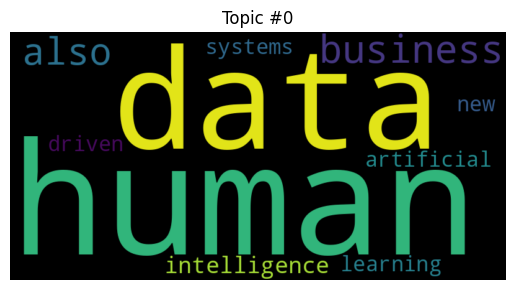

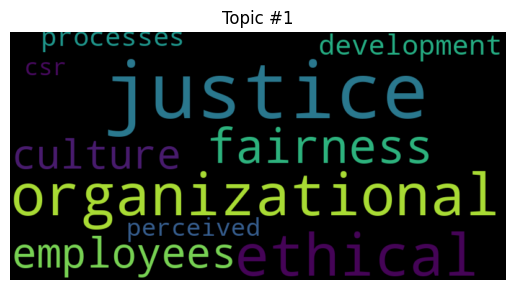

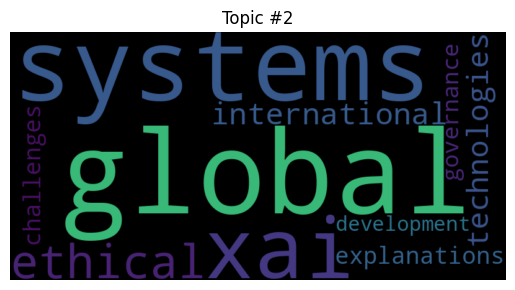

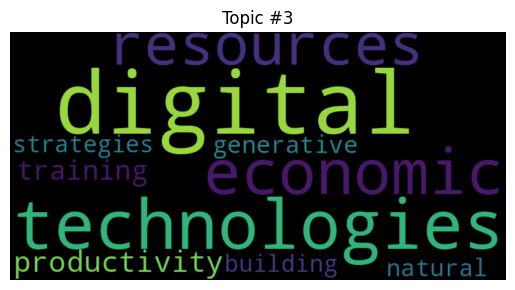

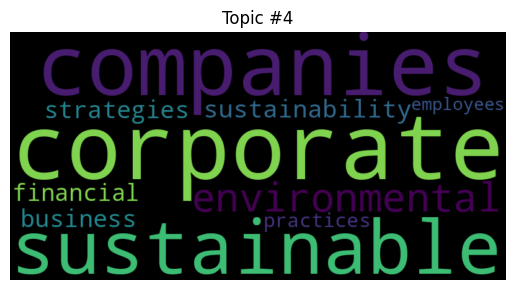

In [42]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word clouds for each topic
for index, topic in enumerate(lda_model.components_):
    plt.figure()
    word_freqs = {vectorizer.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[-10:]}
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freqs)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic #{index}")
    plt.show()


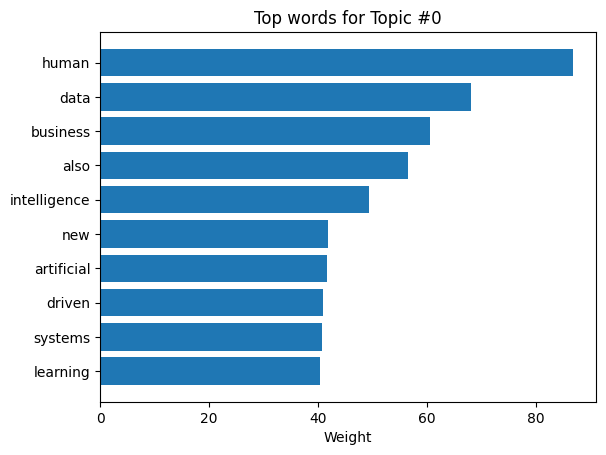

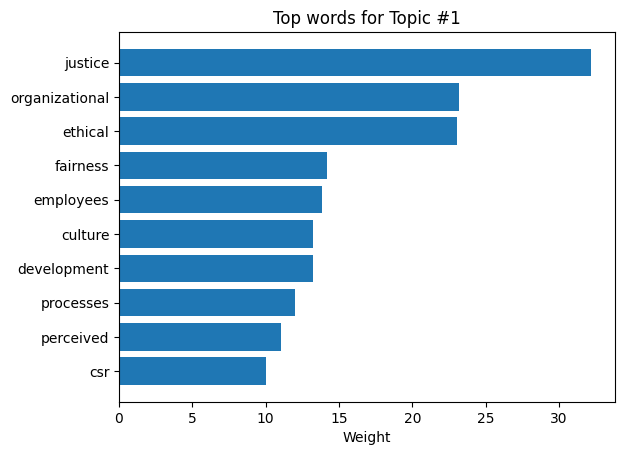

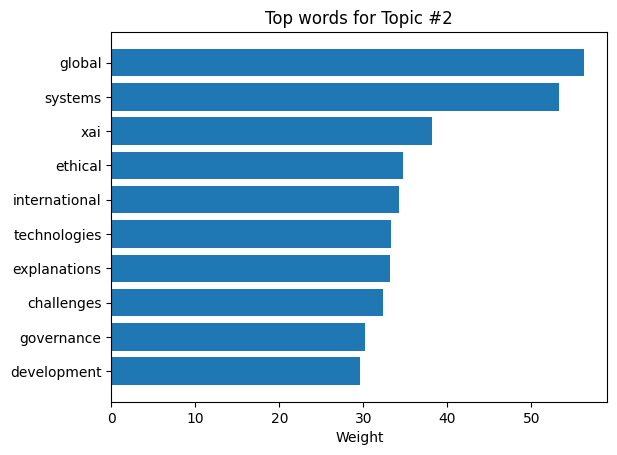

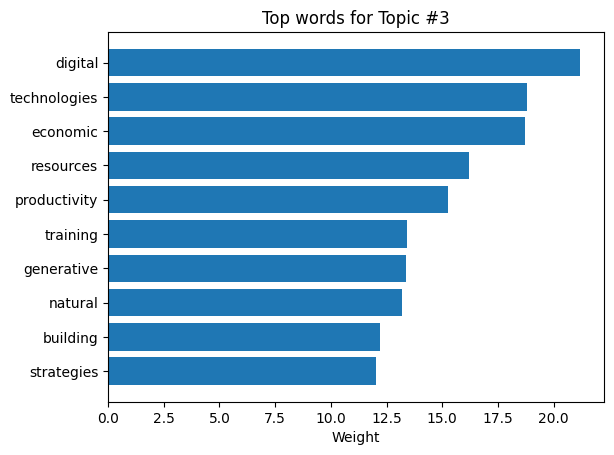

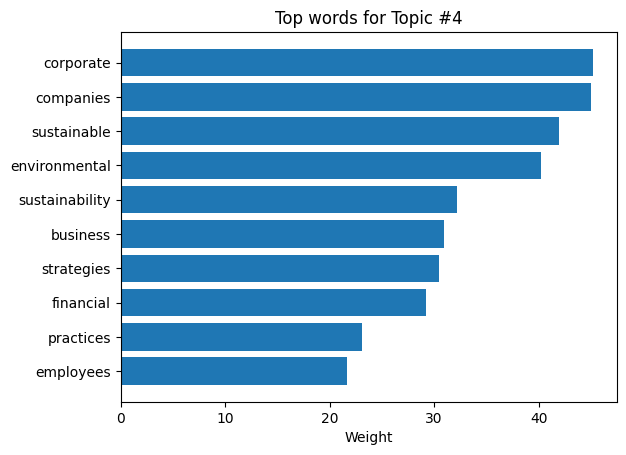

In [43]:
import numpy as np

# Generate bar charts for each topic
for index, topic in enumerate(lda_model.components_):
    plt.figure()
    top_indices = topic.argsort()[-10:]
    top_features = [vectorizer.get_feature_names_out()[i] for i in top_indices]
    top_weights = [topic[i] for i in top_indices]
    y_pos = np.arange(len(top_features))

    plt.barh(y_pos, top_weights, align='center')
    plt.yticks(y_pos, top_features)
    plt.xlabel("Weight")
    plt.title(f"Top words for Topic #{index}")
    plt.show()


In [47]:
import openai
import os

openai.api_key = "sk-proj-c3sFzKlKtFmsNNWqcnPfT3BlbkFJla7GHLmgbhBFl64ckus7"

# Function to code a document with custom stopwords
def code_document_with_stopwords(content):
    stopwords = [
        "artificial intelligence", "AI", "global organizations", "corporate strategies",
        "organizational policy", "impact", "effect", "consequence", "influence",
        "qualitative research", "meta-analysis", "thematic analysis"
    ]
    stopword_prompt = f"Ignore these terms: {', '.join(stopwords)}.\n\n"
    prompt = f"Read the following document and identify key themes:\n\n{stopword_prompt}{content}"

    response = openai.ChatCompletion.create(
        model="gpt-4-turbo",
        messages=[
            {"role": "system", "content": "You are an expert thematic coder."},
            {"role": "user", "content": prompt}
        ]
    )
    return response.choices[0].message['content']

# Directory where files are saved
directory = "/content/papers"

# Iterate through the files and code them
results = {}
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    with open(filepath, 'r', encoding='utf-8') as file:
        content = file.read()
        themes = code_document_with_stopwords(content)
        results[filename] = themes

# Display the results
for filename, themes in results.items():
    print(f"File: {filename}\nThemes:\n{themes}\n")



File: Explainable_Artificial_Intelligence_XAI.txt
Themes:
Based on the content provided in the document above, several key themes can be identified:

1. **Transparency and Understandability**: The document emphasizes the importance of making AI systems clear and understandable to users. This involves demystifying the internal decision-making processes of AI models to foster trust and improve user interaction.

2. **Ethical and Legal Aspects**: There is a significant focus on addressing potential ethical and legal issues associated with AI, such as bias, unfairness, and accountability. These concerns underscore the necessity for systems that are not only technologically advanced but also ethically sound and legally compliant.

3. **Techniques for Explainability**: Various methods and technologies are highlighted as solutions for enhancing the explainability of AI systems. These include feature importance tools, decision trees, visualization techniques, and example-based explanations, ea

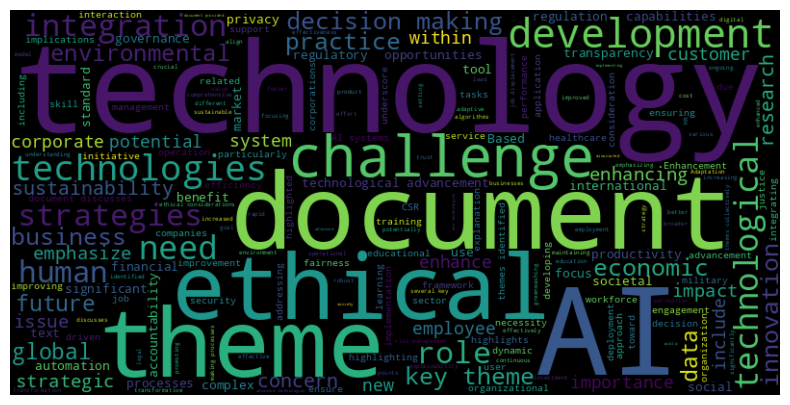

In [48]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud for the themes
all_themes = " ".join(themes for themes in results.values())
wordcloud = WordCloud(width=800, height=400).generate(all_themes)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


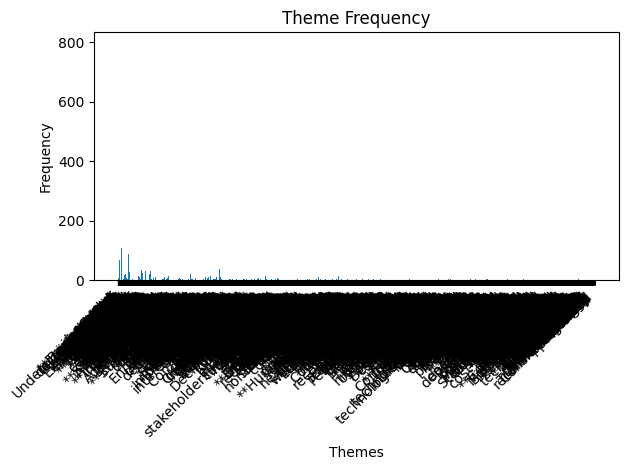

In [49]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the frequency of each theme
theme_counts = Counter(theme for themes in results.values() for theme in themes.split())

# Plot the bar chart
plt.bar(theme_counts.keys(), theme_counts.values())
plt.xlabel("Themes")
plt.ylabel("Frequency")
plt.title("Theme Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Build the network
for themes in results.values():
    theme_list = themes.split()
    for i, theme1 in enumerate(theme_list):
        for theme2 in theme_list[i + 1:]:
            if G.has_edge(theme1, theme2):
                G[theme1][theme2]['weight'] += 1
            else:
                G.add_edge(theme1, theme2, weight=1)

# Draw the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1500, font_size=10, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d["weight"]}' for u, v, d in G.edges(data=True)}, font_color='red')
plt.title("Theme Network")
plt.show()
